In [1]:
import torch
import torch.optim as optim
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
# create list of frequencies

# class Env1(object):
#     def __init__(self, T:int, omega:float, c:float, A:float):
#         self.T = T
#         self.omega = omega
#         self.c = c
#         self.eps = 10**-5
#         self.t = 0
        
class Options:
    """Class containing all parameters"""
    def __init__(self):
        # Env params
        self.T = 10
        self.omega = []
        self.c = 1
        self.eps = 10**-5
        self.A = 2
        self.t = 0
        self.lr = 1e-3
        self.timesteps = 20
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
opt = Options()

def f(x:torch.Tensor, t:int, omega:float):
    return alpha(t,omega) * (x.pow(2))
    
def alpha(t:int, omega:torch.Tensor):
    if t <= opt.T:
        return opt.c
    return (opt.A/2) * (1 + torch.sin(omega*t) + opt.eps)

In [3]:
adam_deltas = defaultdict(list)
sgd_deltas = defaultdict(list)
omegas = [torch.Tensor([2])]

for omega in omegas:
    x_adam = torch.randn(1)
    x_sgd = x_adam.clone()
    x_adam.requires_grad_(True)
    x_sgd.requires_grad_(True)
    
    adam_opt = optim.Adam([x_adam], lr=opt.lr)
    sgd_opt = optim.SGD([x_sgd], lr=opt.lr)
    
    for t in range(opt.timesteps):
        # Perform Adam and SGD steps
        y_adam = f(x_adam, t, omega)
        adam_opt.zero_grad()
        y_adam.backward()
        adam_opt.step()
        
        y_sgd = f(x_sgd, t, omega)
        sgd_opt.zero_grad()
        y_sgd.backward()
        sgd_opt.step()
        
        # Append to results
        adam_deltas[omega].append(x_adam.detach().item())
        sgd_deltas[omega].append(x_sgd.detach().item())

In [4]:
adam_deltas

defaultdict(list,
            {tensor([2.]): [-0.8149407505989075,
              -0.8139407634735107,
              -0.8129408359527588,
              -0.8119409680366516,
              -0.810941219329834,
              -0.8099415898323059,
              -0.8089420795440674,
              -0.8079427480697632,
              -0.8069435954093933,
              -0.8059446215629578,
              -0.8049458861351013,
              -0.8039478659629822,
              -0.8030354380607605,
              -0.8020815849304199,
              -0.8011103272438049,
              -0.8002287149429321,
              -0.799306333065033,
              -0.7983518838882446,
              -0.7974835634231567,
              -0.7965870499610901]})

In [5]:
sgd_deltas

defaultdict(list,
            {tensor([2.]): [-0.8143088817596436,
              -0.8126802444458008,
              -0.8110548853874207,
              -0.8094328045845032,
              -0.8078139424324036,
              -0.8061982989311218,
              -0.804585874080658,
              -0.8029767274856567,
              -0.8013707995414734,
              -0.7997680306434631,
              -0.7981684803962708,
              -0.796586275100708,
              -0.7964358329772949,
              -0.7936282753944397,
              -0.7916110157966614,
              -0.7915920615196228,
              -0.7891358733177185,
              -0.7867225408554077,
              -0.7867096066474915,
              -0.7846698760986328]})

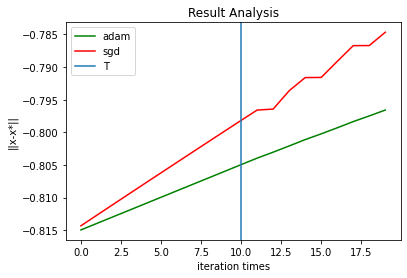

In [6]:
import numpy as numpy
import matplotlib as mpl
import matplotlib.pyplot as plt

x= numpy.array(adam_deltas[omega])
y= numpy.array(sgd_deltas[omega])
L=numpy.array(list(range(opt.timesteps)))
plt.title('Result Analysis')
plt.plot(L, x, color='green', label='adam')
plt.plot(L, y, color='red', label='sgd')
plt.axvline(opt.T, label='T')
plt.legend() 
plt.xlabel('iteration times')
plt.ylabel('||x-x*||')
plt.show()